In [1]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import dshstexas
%matplotlib notebook

In [2]:
data_dir = "bin/data-2020-08-17"
case_count_file = "%s/TexasCOVID19DailyCountyCaseCountData.xlsx" %data_dir
deaths_file = "%s/TexasCOVID19DailyCountyFatalityCountData.xlsx" %data_dir
active_cases_file = "%s/TexasCOVID-19ActiveCaseDatabyCounty.xlsx" %data_dir
tests_file = "%s/TexasCOVID-19CumulativeTestsOverTimebyCounty.xlsx" %data_dir
case_count_df = dshstexas.read(case_count_file)
deaths_df = dshstexas.read(deaths_file)
active_cases_df = dshstexas.read(active_cases_file)
tests_df = dshstexas.read(tests_file)

# create iterator:
frames = [
    ("cumulative cases", case_count_df),
    ("deaths", deaths_df),
    ("active cases", active_cases_df),
    ("testing", tests_df)]

/home/jrangel/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:1418: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)


# By the numbers:

/home/jrangel/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


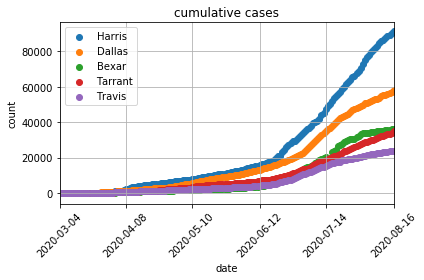

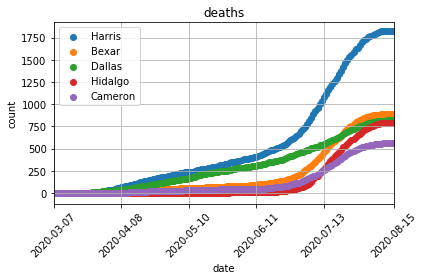

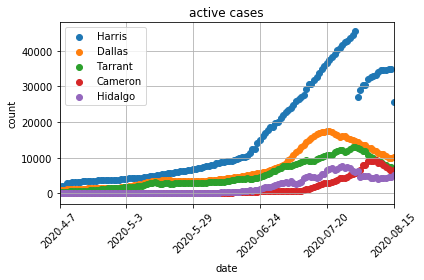

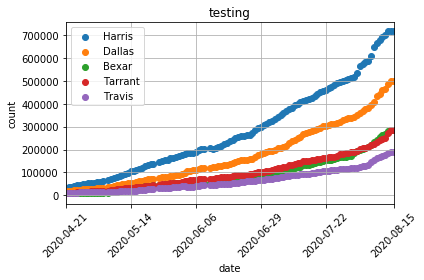

In [3]:
for name, data in frames:
    # sort to get top 5:
    most_recent_date = data.columns[-1]
    df = data.sort_values(by=most_recent_date, ascending=False).copy()

    # get subset of possible dates to display on x axis:
    n_dates = len(df.columns) - 1
    n_ticks = 6
    dates_ii = np.linspace(0, n_dates, n_ticks)
    dates_ii = [int(x) for x in dates_ii]
    xaxis_dates = [df.columns[x] for x in dates_ii]
    
    # plot top 5:
    plt.figure()
    plt.title("%s" %name)
    for county in df.index[:5]:
        plt.scatter(df.columns, df.loc[county, :], label=county)
    plt.legend()
    plt.xlim([xaxis_dates[0], xaxis_dates[-1]])
    plt.xticks(xaxis_dates, rotation=45)
    plt.grid()
    plt.xlabel("date")
    plt.ylabel("count")
    plt.tight_layout()